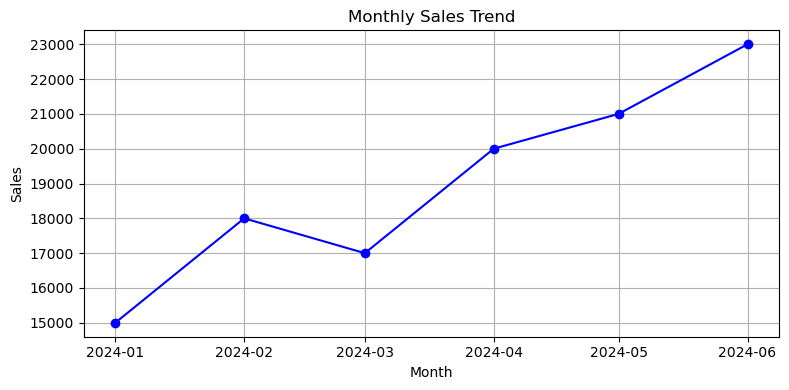

 Mean Squared Error (Linear Regression): 4105000.0

 Predicted Sales for July, August, September: [25000. 26900. 28800.]


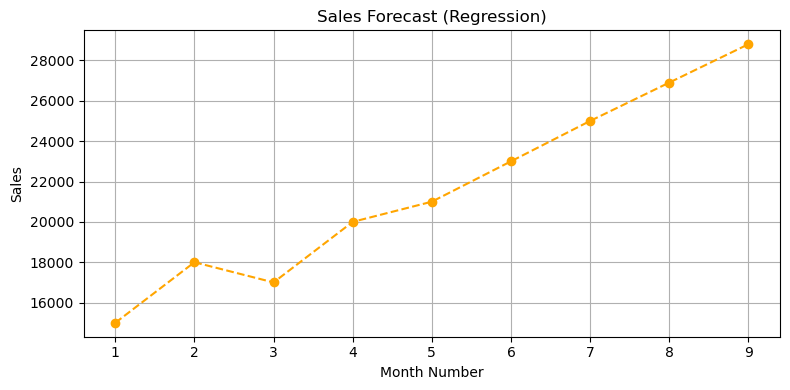


 [Random Forest] Classification Accuracy: 0.5

 [Random Forest] Classification Report:
               precision    recall  f1-score   support

         Low       0.50      1.00      0.67         1
      Medium       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

 [Random Forest] Confusion Matrix:
 [[1 0]
 [1 0]]

 [Random Forest] Predicted Sales Categories for July, August, September: ['High' 'High' 'High']

 [KNN] Classification Accuracy: 0.5

 [KNN] Classification Report:
               precision    recall  f1-score   support

         Low       0.00      0.00      0.00         1
      Medium       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

 [KNN] Confusion Matrix:
 [[0 1]
 [0 1]]

In [6]:
#  Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix

#  Create sample sales dataset
data = {
    'Month': ['2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06'],
    'Sales': [15000, 18000, 17000, 20000, 21000, 23000]
}

df = pd.DataFrame(data)
df['Month'] = pd.to_datetime(df['Month'])
df['Month_Num'] = df['Month'].dt.month

# 🏷 Categorize sales for classification
def categorize_sales(s):
    if s < 18000:
        return 'Low'
    elif s <= 21000:
        return 'Medium'
    else:
        return 'High'

df['Sales_Category'] = df['Sales'].apply(categorize_sales)

#  Visualization - Sales Trend
plt.figure(figsize=(8, 4))
plt.plot(df['Month'], df['Sales'], marker='o', color='blue')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

#  Linear Regression - Predicting Sales Amount
X_reg = df[['Month_Num']]
y_reg = df['Sales']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)
y_pred_reg = reg_model.predict(X_test_reg)

mse = mean_squared_error(y_test_reg, y_pred_reg)
print(" Mean Squared Error (Linear Regression):", mse)

# 🔮 Future months prediction (Regression)
future_months = pd.DataFrame({'Month_Num': [7, 8, 9]})
future_sales = reg_model.predict(future_months)
print("\n Predicted Sales for July, August, September:", future_sales)

#  Plot - Future Sales Prediction
plt.figure(figsize=(8, 4))
all_months = pd.concat([X_reg, future_months], ignore_index=True)
all_sales = pd.concat([y_reg, pd.Series(future_sales, index=[6, 7, 8])], ignore_index=True)

plt.plot(all_months['Month_Num'], all_sales, marker='o', linestyle='--', color='orange')
plt.title('Sales Forecast (Regression)')
plt.xlabel('Month Number')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

#  Random Forest Classifier - Predicting Sales Category
X_clf = df[['Month_Num']]
y_clf = df['Sales_Category']

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train_clf, y_train_clf)
y_pred_rf = clf_rf.predict(X_test_clf)

#  Random Forest Evaluation
print("\n [Random Forest] Classification Accuracy:", accuracy_score(y_test_clf, y_pred_rf))
print("\n [Random Forest] Classification Report:\n", classification_report(y_test_clf, y_pred_rf, zero_division=0))
print(" [Random Forest] Confusion Matrix:\n", confusion_matrix(y_test_clf, y_pred_rf))

#  Predict Sales Category for Future Months using Random Forest
future_categories_rf = clf_rf.predict(future_months)
print("\n [Random Forest] Predicted Sales Categories for July, August, September:", future_categories_rf)

#  K-Nearest Neighbors Classifier
clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(X_train_clf, y_train_clf)
y_pred_knn = clf_knn.predict(X_test_clf)

#  KNN Evaluation
print("\n [KNN] Classification Accuracy:", accuracy_score(y_test_clf, y_pred_knn))
print("\n [KNN] Classification Report:\n", classification_report(y_test_clf, y_pred_knn, zero_division=0))
print(" [KNN] Confusion Matrix:\n", confusion_matrix(y_test_clf, y_pred_knn))

#  Predict Sales Category for Future Months using KNN
future_categories_knn = clf_knn.predict(future_months)
print("\n [KNN] Predicted Sales Categories for July, August, September:", future_categories_knn)

#  Combine predictions into a DataFrame
future_results = pd.DataFrame({
    'Month': ['2024-07', '2024-08', '2024-09'],
    'Predicted_Sales': future_sales.astype(int),
    'RF_Predicted_Category': future_categories_rf,
    'KNN_Predicted_Category': future_categories_knn
})
print("\n📊 Future Sales Forecast:\n", future_results)